# GRIP Jan'21


## Task 6- Prediction using Decision Tree Algorithm by K Aditya

### Forming the Decision Tree classifier and visualizing it graphically. So as to predict the right class when we feed any new data.

#### Step 1- Importing required libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree

#### Step 2- Loading the dataset

In [5]:
data_iris = pd.read_csv('Iris.csv')

#### Step 3- Exploring the insights of data

In [6]:
data_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [8]:
data_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
data_iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Step 4- Visualizing the data

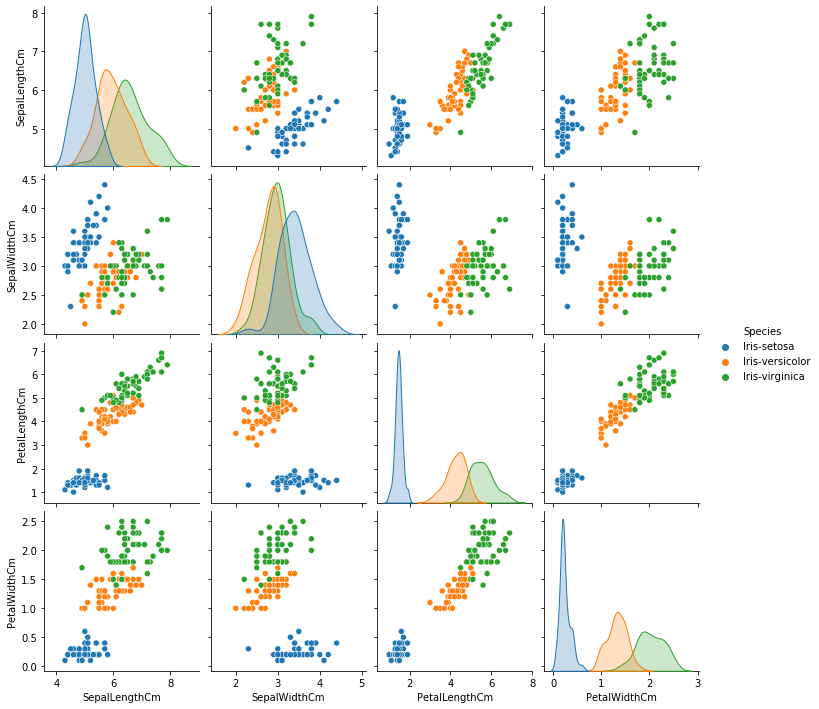

In [10]:
sns.pairplot(data_iris.iloc[:, 1:], hue="Species")

### It is evident that, Iris-setosa forms a separate cluster, as compared to the other two species, Iris-versicolor and Iris-virginica which form inseparable clusters. Data distribution is approximately normal with moderate skewness.

#### Step 5- Finding the data co-relation

In [12]:
cor = data_iris.corr()
cor

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


#### Step 6- Co-relation analysis using heatmap

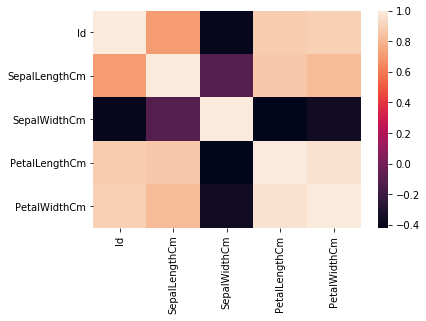

In [13]:
plt.figure()
sns.heatmap(cor)

#### Step 7- Pre-processing data

In [14]:
# Removing the unwanted columns from the data
data = data_iris.iloc[:,1:5]

In [15]:
target = data_iris['Species']

#### Step 8- Splitting the data for training and testing

In [16]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(data,target, random_state = 101)

In [19]:
# Percentage of each species in training data
print('Percentage of each species in training data')
train_y.value_counts()/len(train_y)*100

Percentage of each species in training data


Iris-setosa        35.714286
Iris-virginica     34.821429
Iris-versicolor    29.464286
Name: Species, dtype: float64

In [20]:
#Percentage of each species in test data
print('Percentage of each species in test data')
test_y.value_counts()/len(test_y)

Percentage of each species in test data


Iris-versicolor    0.447368
Iris-virginica     0.289474
Iris-setosa        0.263158
Name: Species, dtype: float64

### A) Using Gini criterion

#### Step 9a- Training the model 

In [21]:
clf = DecisionTreeClassifier()

In [22]:
clf.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Step 10a- Visualizing the tree

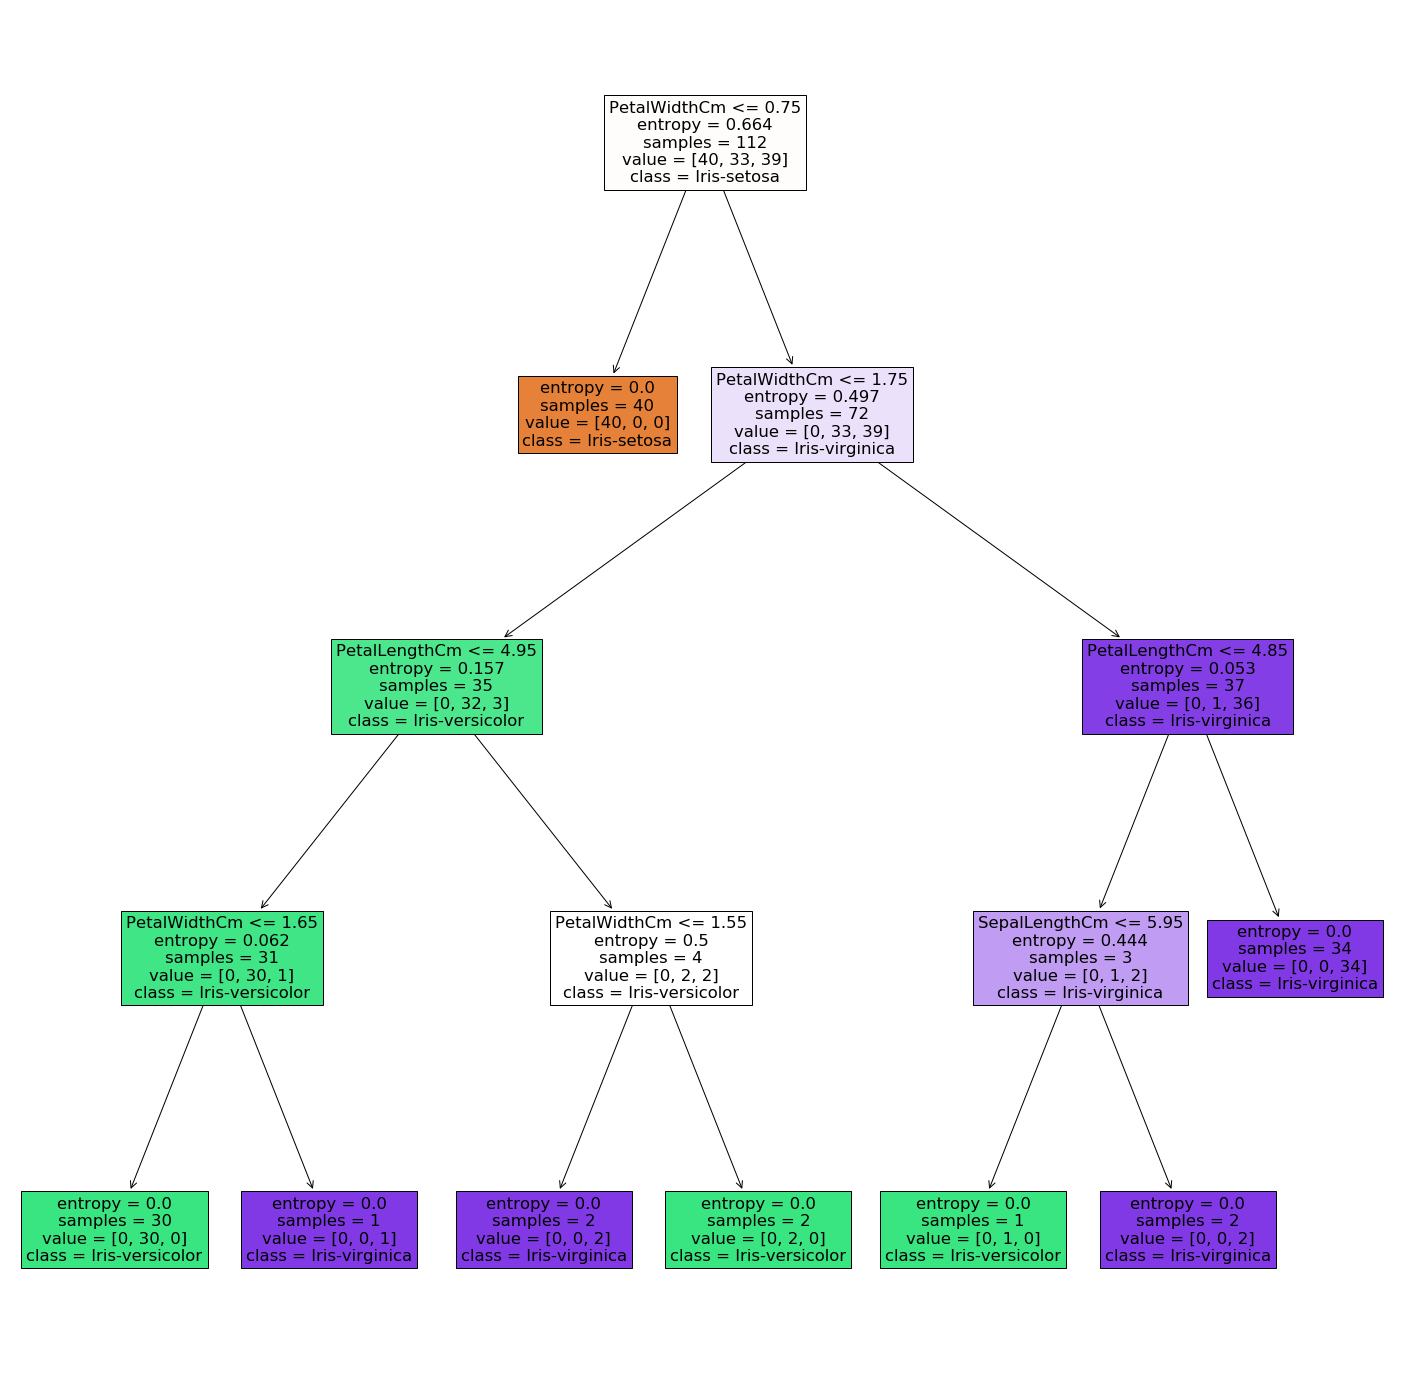

In [23]:
c = list(data.columns)
t = data_iris['Species'].unique()

plt.figure(figsize=(25,25))
plot_tree(clf, feature_names = c, class_names = t, filled = True)
plt.show()

In [24]:
#predicted values
predicted_y = clf.predict(test_x)
predicted_y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

#### Step 11a- Evaluation Metrics

In [25]:
import sklearn.metrics as sm

In [28]:
print('Accuracy score of model is: {0}'.format(sm.accuracy_score(test_y, predicted_y)))

Accuracy score of model is: 0.9736842105263158


In [29]:
sm.confusion_matrix(test_y, predicted_y)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]], dtype=int64)

#### The accuracy of model is: 97.36842%

### B) Using Entropy criterion

#### Step 9b- Training the model

In [32]:
clf2 = DecisionTreeClassifier(criterion = 'entropy')

In [33]:
clf2.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Step 10b- Visualizing the tree

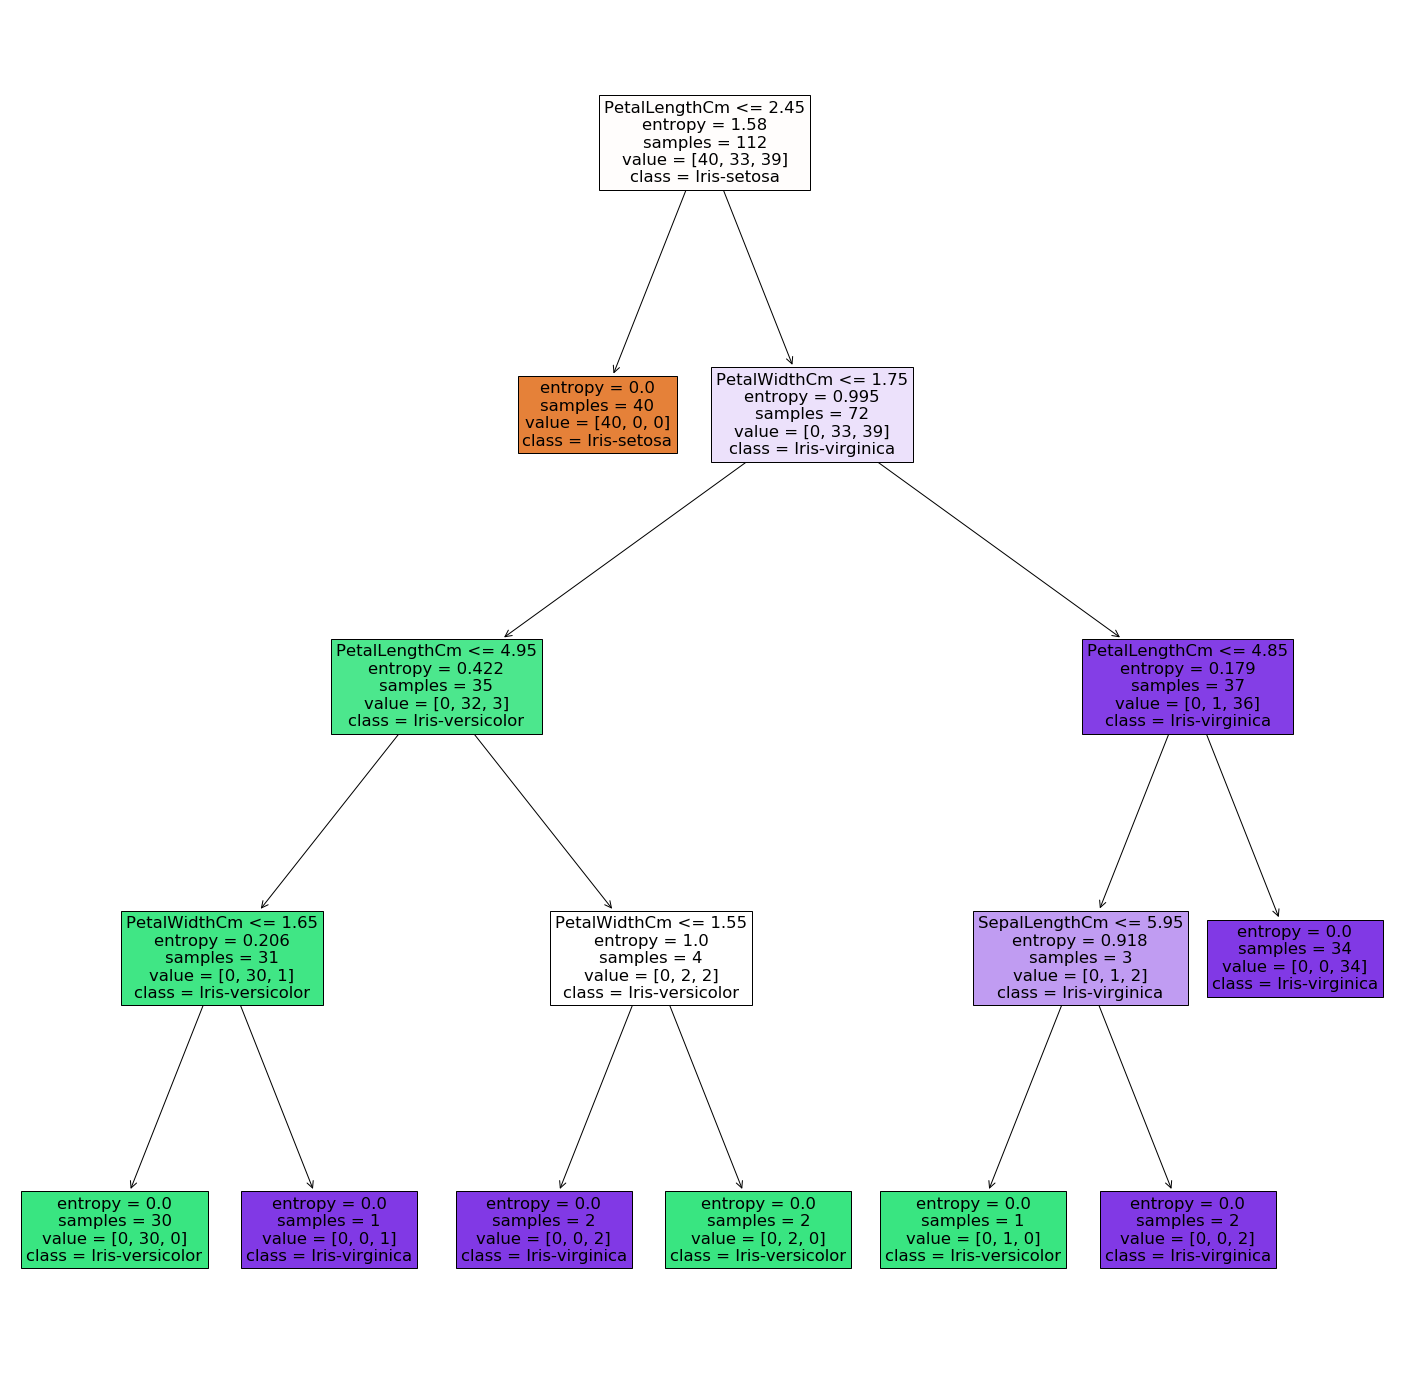

In [34]:
c = list(data.columns)
t = data_iris['Species'].unique()

plt.figure(figsize=(25,25))
plot_tree(clf2, feature_names = c, class_names = t, filled = True)
plt.show()

In [36]:
p2_y = clf2.predict(test_x)
p2_y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

#### Step 11b- Evaluation metrics

In [39]:
print('Accuracy score of model is: {0}'.format(sm.accuracy_score(test_y, p2_y)))

Accuracy score of model is: 0.9736842105263158


In [37]:
sm.confusion_matrix(test_y, p2_y)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]], dtype=int64)

### Therefore, the model accuracy is 97%